# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 8

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **4 мая в 23:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline

## Задача 1: Белые мыши наносят ответный удар (продолжение)

Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

**Предварительный анализ**

Эта часть цже оценена в прошлом дз, просто скопируйте графики.

In [363]:
data = pd.read_csv("archive (2)/Data_Cortex_Nuclear.csv")
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Чтобы вспомнить, что это за данные, для начала выведем простые описательные статистики по вещественным параметрам.

In [262]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


Количество записей каждого класса:

In [263]:
data['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

Количество записей по генотипам:

In [264]:
data.Genotype.value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`. 

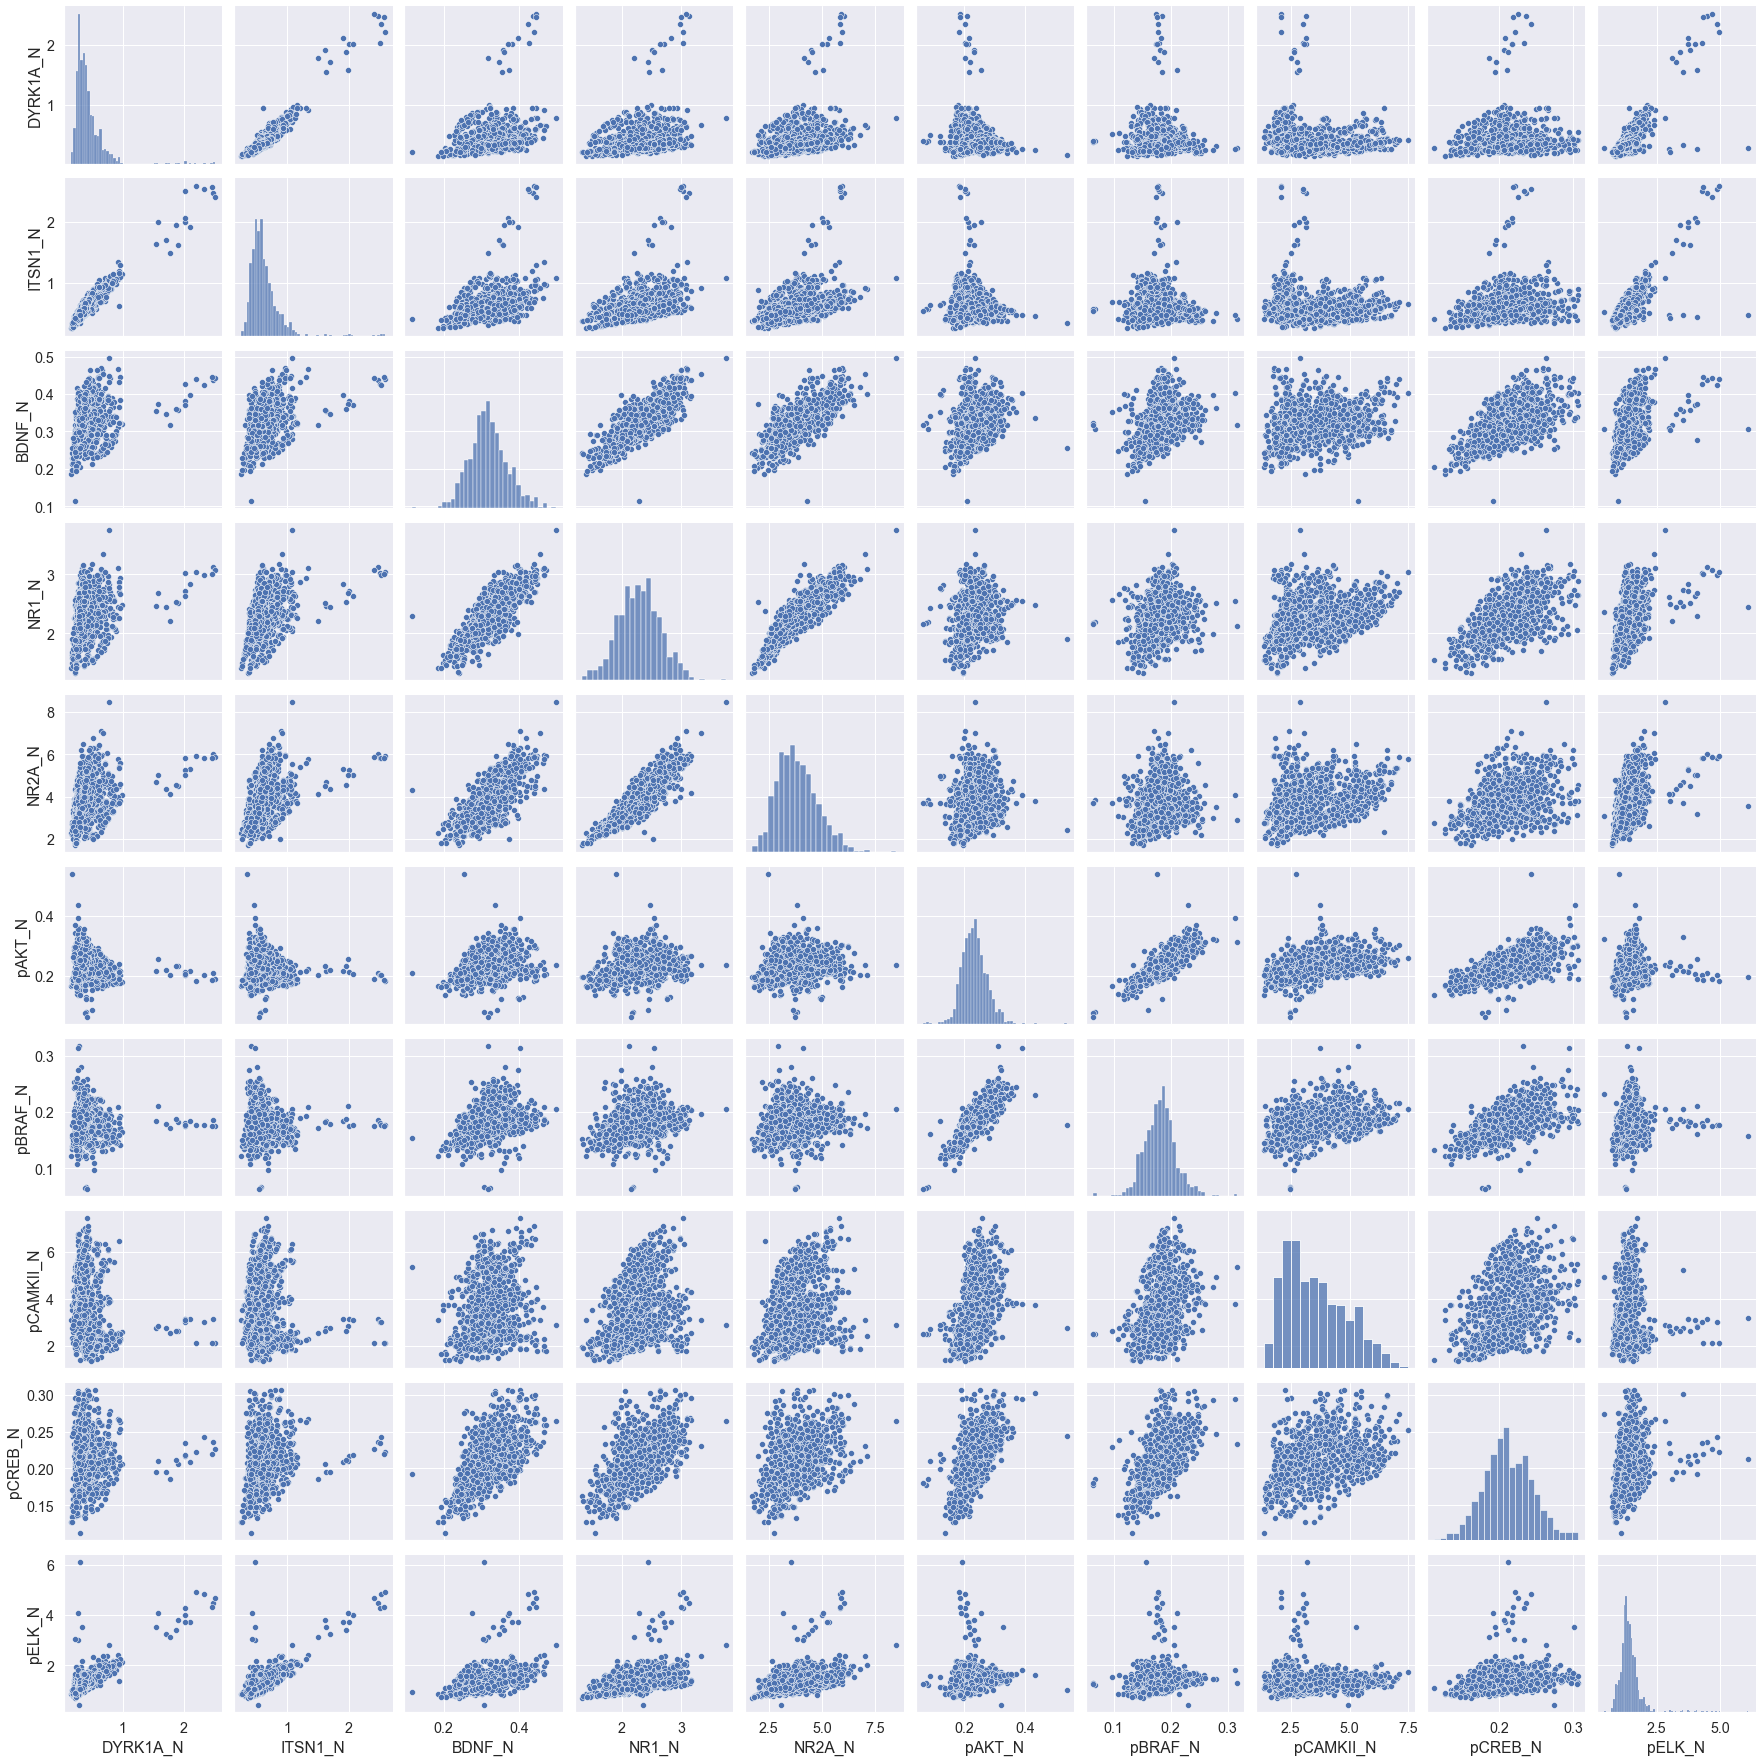

При визуализации в двумерных проекциях можно также строить ядерные оценки плотности:

Визуализируйте двумерные проекции данных и ядерные оценки плотности с использованием `sns.PairGrid` отдельно по генотипам для 10 признаков. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета.

Не успело посчитаться. Есть графики из прошлого дз

#### 2. Дисперсионный анализ

##### 2.1. Зависимость распределения DYRK1A_N от генотипа

Проверьте гипотезу о равенстве распределений с использованием критерия Уилкоксона-Манна-Уитни с использованием различных альтернатив.  В реальных исследованиях нужно использовать конкретную альтернативу. 

Сделайте выводы. Также поясните, почему в данной задаче можно использовать этот критерий.

In [265]:
x_d =  np.array(data['DYRK1A_N'][(data['DYRK1A_N']<1.5) & (data['Genotype'] == 'Control')])
y_d =  np.array(data['DYRK1A_N'][(data['DYRK1A_N']<1.5) & (data['Genotype'] != 'Control')])

In [266]:
(sps.mannwhitneyu(x_d,y_d ,alternative = 'two-sided'),
sps.mannwhitneyu(x_d,y_d ,alternative = 'less'),
 sps.mannwhitneyu(x_d,y_d ,alternative = 'greater') )

(MannwhitneyuResult(statistic=94120.0, pvalue=1.0767186225137933e-20),
 MannwhitneyuResult(statistic=94120.0, pvalue=5.383593112568966e-21),
 MannwhitneyuResult(statistic=94120.0, pvalue=1.0))

**Вывод** Этот критерий можно использовать, потому что выборки независимые. Выходит, что распределеие первой выборки больше. МПГ применять не стал, потому что p_v и так достаточно показательные

Посчитайте реализацию оценки сдвига, связанную со статистикой Манна-Уитни, см. лекцию 11.

In [267]:
W = np.zeros((len(x_d),len(y_d)))
for i in range(len(x_d)):
    W[i] = x_d[i] - y_d
Theta = np.median(W.ravel())
Theta

-0.07380183499999998

Посчитайте реализацию доверительного интервала величины сдвига. 


In [271]:
k_aplha = int(np.round_(len(x_d) * len(y_d) / 2 - 1/2 - sps.norm.ppf(0.95) * np.sqrt( len(x_d) * len(y_d) * (
    len(x_d) + len(y_d) + 1) / 12 ) ) )

np.sort(W.ravel())[k_aplha],np.sort(W.ravel())[len(x_d) * len(y_d) - 2] # так как отсчет с 0


(-0.086614144, 0.6153885809999999)

##### 2.2. Зависимость распределения  BDNF_N от генотипа


Проверьте гипотезу с использованием критерия Уилкоксона-Манна-Уитни при различных альтернативах, посчитайте оценку сдвига и доверительный интервал. Сделайте выводы. 

In [272]:
x_b =  np.array(data['BDNF_N'][(data['BDNF_N']>0.14) & (data['Genotype'] == 'Control')])
y_b =  np.array(data['BDNF_N'][(data['BDNF_N']>0.14) & (data['Genotype'] != 'Control')])

In [273]:
(sps.mannwhitneyu(x_b,y_b ,alternative = 'two-sided'),
sps.mannwhitneyu(x_b,y_b ,alternative = 'less'),
 sps.mannwhitneyu(x_b,y_b ,alternative = 'greater') )

(MannwhitneyuResult(statistic=152167.0, pvalue=0.119357032565025),
 MannwhitneyuResult(statistic=152167.0, pvalue=0.9403447927358055),
 MannwhitneyuResult(statistic=152167.0, pvalue=0.0596785162825125))

In [274]:
from statsmodels.sandbox.stats.multicomp import multipletests

multipletests([sps.mannwhitneyu(x_b,y_b ,alternative = 'two-sided')[1],
               sps.mannwhitneyu(x_b,y_b ,alternative = 'less')[1],
               sps.mannwhitneyu(x_b,y_b ,alternative = 'greater')[1]], method = 'holm')

(array([False, False, False]),
 array([0.23871407, 0.94034479, 0.17903555]),
 0.016952427508441503,
 0.016666666666666666)

Ни один из критериев не сработал. Так что не отвеграем гипотезу о равности распределений

In [276]:
W = np.zeros((len(x_b),len(y_b)))
for i in range(len(x_b)):
    W[i] = x_b[i] - y_b
Theta = np.median(W.ravel())
Theta

0.004598698999999984

In [277]:
k_aplha = int(np.round_(len(x_b) * len(y_b) / 2 - 1/2 - sps.norm.ppf(0.95) * np.sqrt( 
    len(x_b) * len(y_b) * (len(x_b) + len(y_b) + 1) / 12 ) ) )

np.sort(W.ravel())[k_aplha],np.sort(W.ravel())[len(x_b) * len(y_b) - 2] # так как отсчет с 0

(-0.00025417999999999275, 0.293724054)

Доверительный интервал показывает, что с вероятность 95 процентов наш сдвиг лежит в нем, при верности гиотезы о смещенности. При нулевой гипотезе о равности распределений смещнность равна 0 и этот интервал не противоречит ей. Мы бы отвергили гипотезу если бы интервал не содержал ноль


**Вывод**

Как связаны доверительные интервалы с проверкой гипотез? Вам могут помочь прошлые лекции. Подтверждается ли это в данном примере?

Ответил выше

Проверьте выборку на нормальность с помощью критерия Шапиро-Уилка и QQ-plot. Можно ли применять методы, (не)устойчивые к отклонениям от нормальности?

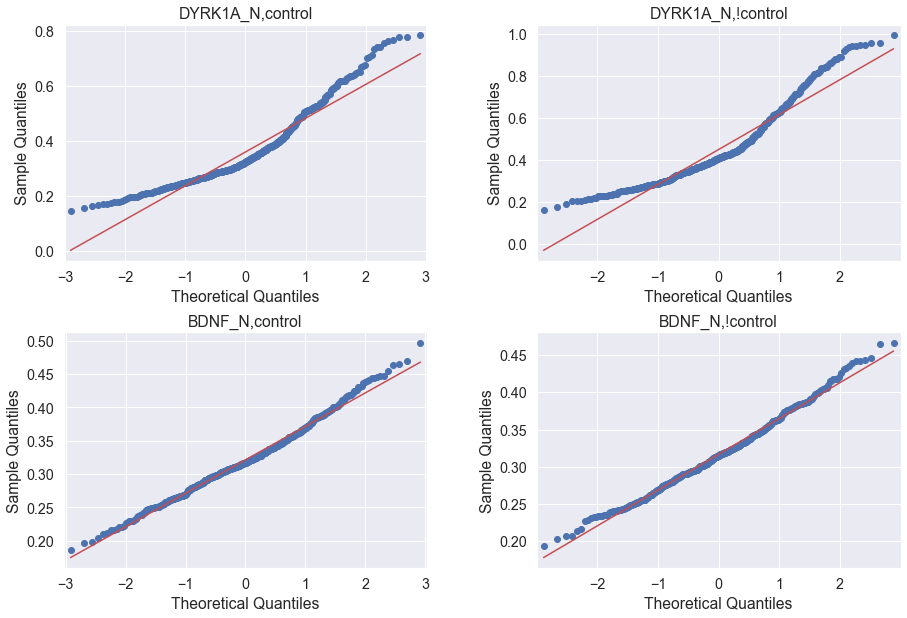

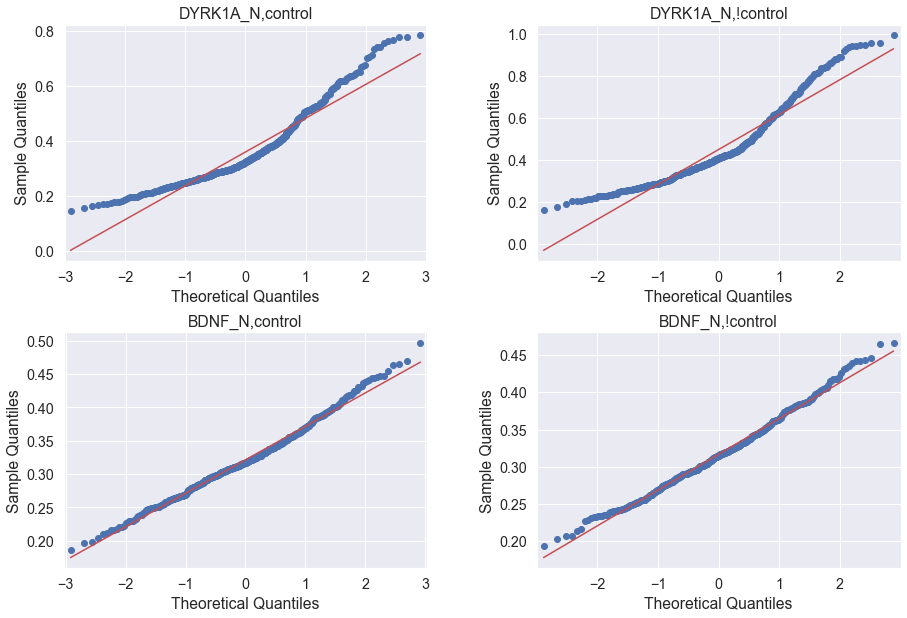

In [91]:
from statsmodels.graphics import gofplots as gf
fig, axes = plt.subplots(2,2,figsize = (15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
axes[0][0].set_title('DYRK1A_N,control')
axes[0][1].set_title('DYRK1A_N,!control')
axes[1][0].set_title('BDNF_N,control')
axes[1][1].set_title('BDNF_N,!control')
gf.qqplot(x_d,ax = axes[0,0],line = 'r')
gf.qqplot(y_d,ax = axes[0,1],line = 'r')
gf.qqplot(x_b,ax = axes[1,0],line = 'r')
gf.qqplot(y_b,ax = axes[1,1],line = 'r')

Почему-то отрисовывается в двойном экземпляре

Какой критерий можно применять в случае нормальных выборок и одинаковой дисперсии? Можно ли его применять для проверке гипотез о признаках DYRK1A_N, BDNF_N? Примените этот критерий для признака BDNF_N, сделайте выводы.

Для одинаковых дисперсий можно применить t-test, но это нужно проверить с помощью f-теста. На глаз можно применить только к BDNF_N. Сделаем МПГ

In [99]:

def f_test(x, y, alt="two_sided"):
    df1 = len(x) - 1
    df2 = len(y) - 1
    f = x.var() / y.var()
    if alt == "greater":
        p = 1.0 - sps.f.cdf(f, df1, df2)
    elif alt == "less":
        p = sps.f.cdf(f, df1, df2)
    else:
        # two-sided by default
        p = 2.0*(1.0 - sps.f.cdf(f, df1, df2))
    return f, p

In [358]:
p1 = sps.shapiro(x_b)[1]
p2 = sps.shapiro(y_b)[1]
p3 = f_test(x_b,y_b)[1]
p4 = sps.ttest_ind(x_b,y_b)[1]

In [362]:
multipletests([p1,p2,p3,p4], method = 'holm')

(array([ True,  True, False, False]),
 array([0.00512513, 0.01855333, 0.29894394, 0.23247799]),
 0.012741455098566168,
 0.0125)

 Значит, можно предположить, что две выборки имеют нормальное распределение. Когда дисперсии нужно применить t-test. Мы не знаем равны ли дисперсии у данных выборок, можно это проверить, что мы и сделали. Но на этом уровне значимости нельзя сказать, что средние смещены, из-за МПГ. Интересно, что в данном случае МПГ применяется к критериям уровень значимости которых зависит от верности других. Не уверен, что верно просто применять МПГ, прошу ответить, что нужно делать в таких случаях

Попробуем применить t-test для разных дисперсий

In [368]:
p1 = sps.shapiro(x_b)[1]
p2 = sps.shapiro(y_b)[1]
p3 = sps.ttest_ind(x_b,y_b,equal_var=False)[1]

In [370]:
multipletests([p1,p2,p3], method = 'holm')

(array([ True,  True, False]),
 array([0.00384385, 0.01236889, 0.29894394]),
 0.016952427508441503,
 0.016666666666666666)

Что ж, здесь тоже не получается отвергнуть гипотезу

**Вывод** После проерки гипотез вышло, что можно применять t-test для данной выборки и он результат смещенности выборок

#### 3. Зависимость уровня экспрессии от генотипа для всех исследуемых белков

Задача заключается в том, чтобы среди всех белков отобрать для дальнейшего более подробного анализа те, по которым уровень экспрессии гена отличается по двум генотипам. Для решения задачи проверьте гипотезы об однородности по генотипам для каждого белка с использованием критерия Уилкоксона-Манна-Уитни.

Почему в данном случае стоит использовать его, а не критерий Стьюдента?

Не забудьте о множественной проверке гипотез. Заметим, что цель исследований &mdash; **отбор** признаков для дальнейшего анализа. Какой метод стоит применять в данном случае? *Обратите внимание на то, как устроены данные.*

Распечатайте результаты МПГ для всех признаков. Сделайте вывод.

**Ответы на вопросы**: Мы будем отвергать больше гипотез в случае контролья FDR. Это является более грубой настройкой, которая нам сейчас и нужна. Пользуемся критерием Уилкоксона-Манна-Уитни, так как одна и та же мышка не может быть сначала больно а потом нет. Инетересный вопрос, какой метод примеять для мпг. Разные проверки гипотез можно считать независимыми, если независимы экспрессии разных генов. Как мы видели в прошлой работе, так говорить нельзя. Так что пользуемся методами которые не требуют независимости.

In [130]:
Proteins = data.columns[1:-4]
P_v = np.zeros((len(Poroteins),))  
theta = np.zeros(P_v.shape)
for i,protein in enumerate(Proteins):
    x =  np.array(data[protein][(data['Genotype'] == 'Control') & (data[protein] > 0)])
    y =  np.array(data[protein][(data['Genotype'] != 'Control')& (data[protein] > 0)])
    P_v[i] = sps.mannwhitneyu(x,y ,alternative = 'two-sided')[1]
    W = np.zeros((len(x),len(y)))
    for j in range(len(x)):
        W[j] = x[j] - y
    theta[i] = np.median(W.ravel())

In [139]:
Using_proteins = Proteins[multipletests(P_v, method = 'fdr_by')[0]]
Using_proteins

Index(['DYRK1A_N', 'ITSN1_N', 'NR1_N', 'NR2A_N', 'pCREB_N', 'pELK_N', 'pNR1_N',
       'pNR2A_N', 'pNR2B_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'TRKA_N',
       'APP_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'AMPKA_N', 'NR2B_N', 'RAPTOR_N',
       'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N',
       'S6_N', 'AcetylH3K9_N', 'RRP1_N', 'ARC_N', 'Tau_N', 'GluR3_N', 'IL1B_N',
       'P3525_N', 'SNCA_N', 'pGSK3B_Tyr216_N', 'pS6_N', 'SYP_N', 'H3AcK18_N',
       'EGR1_N', 'H3MeK4_N'],
      dtype='object')

In [134]:
theta[[i for i in range(len(Proteins)) if Proteins[i] in Using_proteins ]]

array([-0.06787438, -0.11404453,  0.06538626,  0.26939125, -0.01203493,
       -0.0520117 ,  0.0388979 ,  0.07984018,  0.06518032, -0.01533216,
        0.02598112, -0.03782689,  0.00974413, -0.02245532, -0.06300193,
        0.02960801,  0.03632473,  0.04056856,  0.02429355,  0.03081845,
        0.01424648, -0.01591046, -0.04407981, -0.00708592, -0.00692443,
       -0.32053563, -0.00844244, -0.09738832, -0.06808969, -0.00471756,
        0.00537929, -0.03267384,  0.01715121,  0.02507688, -0.0054834 ,
        0.00548836, -0.02784268,  0.00537929,  0.03157345, -0.01928043,
        0.01028613, -0.01354444])

Для каждого признака посчитайте оценку сдвига. Сделайте вывод.

Получили признаки с которыми можно дальше работать подробнее. Как и ожидалось, параметры сдвига для них достаточно отличны от 0

**Вывод**

### Задача 2
Для анализа будем использоваться датасет <a href="https://ru.wikipedia.org/wiki/Экспрессия_генов">экспресии генов</a> в нормальных тканях и в <a href="https://ru.wikipedia.org/wiki/Карцинома">карциномах</a>, полученные c помощью нуклеотидных [микрочипов](https://ru.wikipedia.org/wiki/%D0%94%D0%9D%D0%9A-%D0%BC%D0%B8%D0%BA%D1%80%D0%BE%D1%87%D0%B8%D0%BF). Данные опубликованы в работе `Notterman, et al, Cancer Research vol. 61: 2001`.
Всего доступна информация о 18 опухолевых образцах и о соответсвующих им здоровых тканях.

Для лучшего понимания задачи можно почитать следующие статьи:
* https://fb.ru/article/256575/ekspressiya-genov---eto-chto-takoe-opredelenie-ponyatiya
* https://ru.qwe.wiki/wiki/Gene_expression

Загрузим данные

In [ ]:
! wget http://genomics-pubs.princeton.edu/oncology/Data/CarcinomaNormalDatasetCancerResearchText.zip
! unzip CarcinomaNormalDatasetCancerResearchText.zip

Загрузим данные в `pandas` и посмотрим на них:

In [297]:
data = pd.read_table(
    "CarcinomaNormalDatasetCancerResearch.txt", 
    skiprows=range(1,8), index_col=0, usecols=range(39)
)
data = data.drop(['Sample'], axis=1)

data.head()

,Description,Tumor 27,Tumor 29,Tumor 34,Tumor 28,Tumor 35,Tumor 8,Tumor 3,Tumor 9,Tumor 4,...,Normal 4,Normal 32,Normal 39,Normal 10,Normal 33,Normal 5,Normal 11,Normal 6,Normal 12,Normal 40
Accession Number,,,,,,,,,,,,,,,,,,,,,
X53416,Human mRNA for actin-binding protein (filamin)...,70.0,108.0,75.0,871.0,-92.0,21.0,225.0,-346.0,-378.0,...,632.0,1412.0,1122.0,644.0,1760.0,488.0,164.0,1282.0,68.0,928.0
M83670,"""Human carbonic anhydrase IV mRNA, complete cds""",-81.0,-30.0,-1.0,4.0,-34.0,-13.0,118.0,-35.0,31.0,...,185.0,288.0,416.0,625.0,320.0,564.0,330.0,116.0,718.0,332.0
X90908,H.sapiens mRNA for I-15P (I-BABP) protein,25.0,-7.0,5.0,14.0,14.0,5.0,-5.0,37.0,-29.0,...,4723.0,-21.0,-7.0,-28.0,-8.0,-29.0,-13.0,-4.0,-50.0,4.0
M97496,"""Homo sapiens guanylin mRNA, complete cds""",10.0,60.0,48.0,78.0,19.0,11.0,175.0,42.0,105.0,...,1107.0,731.0,1559.0,1762.0,917.0,1303.0,721.0,542.0,1816.0,412.0
X90908,H.sapiens mRNA for I-15P (I-BABP) protein,22.0,0.0,6.0,-6.0,11.0,-18.0,-40.0,39.0,-54.0,...,3344.0,8.0,5.0,-7.0,-2.0,-9.0,12.0,0.0,-28.0,0.0


Посмотрим также на хвост данных

In [141]:
data.tail()

,Description,Tumor 27,Tumor 29,Tumor 34,Tumor 28,Tumor 35,Tumor 8,Tumor 3,Tumor 9,Tumor 4,...,Normal 4,Normal 32,Normal 39,Normal 10,Normal 33,Normal 5,Normal 11,Normal 6,Normal 12,Normal 40
Accession Number,,,,,,,,,,,,,,,,,,,,,
X54489,Human gene for melanoma growth stimulatory act...,123.0,271.0,127.0,59.0,265.0,3.0,110.0,30.0,97.0,...,3.0,8.0,16.0,8.0,19.0,11.0,3.0,7.0,21.0,32.0
T55008,yb45h04.s1 Homo sapiens cDNA clone 74167 3' si...,2.0,-1.0,7.0,3.0,-2.0,9.0,7.0,-5.0,0.0,...,-4.0,-5.0,-17.0,15.0,-10.0,7.0,-5.0,3.0,22.0,-5.0
M10065,"""Human apolipoprotein E (epsilon-4 allele) gen...",19.0,-51.0,192.0,367.0,126.0,145.0,-14.0,-53.0,-51.0,...,-103.0,39.0,-10.0,-97.0,-1.0,-145.0,-63.0,-69.0,-214.0,72.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В конце прочитались две пустых строки. Удалим их и убедимся, что пропусков в данных нет

In [305]:
data = data.iloc[:-2]
data.isna().sum()

Description    1
Tumor 27       0
Tumor 29       0
Tumor 34       0
Tumor 28       0
Tumor 35       0
Tumor 8        0
Tumor 3        0
Tumor 9        0
Tumor 4        0
Tumor 32       0
Tumor 39       0
Tumor 10       0
Tumor 33       0
Tumor 5        0
Tumor 11       0
Tumor 6        0
Tumor 12       0
Tumor 40       0
Normal 27      0
Normal 29      0
Normal 34      0
Normal 28      0
Normal 35      0
Normal 8       0
Normal 3       0
Normal 9       0
Normal 4       0
Normal 32      0
Normal 39      0
Normal 10      0
Normal 33      0
Normal 5       0
Normal 11      0
Normal 6       0
Normal 12      0
Normal 40      0
dtype: int64

Каждый ряд соответствует какому-то из интересующих нас генов, а колонка соответствует данным об экспресии каждого гена в опухолевых (`Tumor`) и контрольных (`Normal`) клеток.

Явно укажем вещественный тип данных

In [307]:
data.iloc[:, 2:] = data.iloc[:, 2:].astype('float')

Проверим, уникальны ли все образцы в датасете, для этого сравним количество уникальных ID генов с количеством строк:

In [308]:
len(np.unique(data.index)), len(data.index)

(6604, 6604)

Некоторые эксперименты повторялись более одного раза. Оставим те, где средний уровень экспрессии выше.

In [309]:
data['mean_expr'] = data.iloc[:, 1:-1].mean(axis=1)
data.sort_values(by=['mean_expr'], ascending=False)
data = data.groupby('Accession Number').first()

Сохраним описания генов и данные по их экспрессии отдельно. Значение средней экспрессии нам не нужны, поэтому избавимся от них

In [351]:
expr_data, descr = data.drop(
    ['Description', 'mean_expr'], axis=1
), data.Description

In [352]:
expr_data.head()

,Tumor 27,Tumor 29,Tumor 34,Tumor 28,Tumor 35,Tumor 8,Tumor 3,Tumor 9,Tumor 4,Tumor 32,...,Normal 4,Normal 32,Normal 39,Normal 10,Normal 33,Normal 5,Normal 11,Normal 6,Normal 12,Normal 40
Accession Number,,,,,,,,,,,,,,,,,,,,,
BioB,-2.0,-11.0,-17.0,-1.0,-14.0,-8.0,-13.0,31.0,-24.0,-17.0,...,-23.0,-10.0,-13.0,-25.0,-12.0,-10.0,3.0,-3.0,-24.0,-14.0
BioC,12.0,9.0,17.0,18.0,10.0,53.0,-2.0,57.0,-15.0,54.0,...,-16.0,13.0,14.0,-10.0,14.0,-18.0,75.0,-20.0,22.0,3.0
BioD,107.0,65.0,108.0,95.0,94.0,473.0,93.0,161.0,60.0,232.0,...,58.0,104.0,117.0,142.0,123.0,207.0,461.0,137.0,289.0,82.0
D00003,2.0,7.0,1.0,-3.0,0.0,10.0,15.0,-2.0,36.0,-1.0,...,626.0,0.0,0.0,74.0,4.0,13.0,24.0,4.0,4.0,-1.0
D00015,26.0,13.0,13.0,9.0,2.0,10.0,20.0,17.0,21.0,17.0,...,24.0,79.0,22.0,52.0,59.0,40.0,42.0,71.0,43.0,60.0


Для удобства работы транспонируем матрицу данных об экспрессии, и разметим для каждой строки, является ли образец опухолевым или нормой

In [353]:
expr_data = expr_data.T

Осуществим разметку данных

In [354]:
expr_data['Label'] = expr_data.index.map(
    lambda x: -1 if x.split(' ')[0] == 'Tumor' else 1
)

expr_data.head()

Accession Number,BioB,BioC,BioD,D00003,D00015,D00102,D00137,D00173,D00265,D00306,...,Z50753,Z50788,b-actin-3,b-actin-5,b-actin-M,cre,gapdh-3,gapdh-5,gapdh-M,Label
Tumor 27,-2.0,12.0,107.0,2.0,26.0,5.0,18.0,1.0,153.0,-7.0,...,35.0,-1.0,797.0,559.0,849.0,246.0,1214.0,676.0,873.0,-1
Tumor 29,-11.0,9.0,65.0,7.0,13.0,2.0,13.0,5.0,145.0,-7.0,...,26.0,3.0,1298.0,409.0,1093.0,414.0,1394.0,477.0,609.0,-1
Tumor 34,-17.0,17.0,108.0,1.0,13.0,0.0,11.0,10.0,132.0,-6.0,...,25.0,1.0,862.0,667.0,961.0,449.0,1252.0,635.0,754.0,-1
Tumor 28,-1.0,18.0,95.0,-3.0,9.0,10.0,28.0,8.0,73.0,-17.0,...,41.0,-2.0,1047.0,643.0,1100.0,369.0,1313.0,785.0,1013.0,-1
Tumor 35,-14.0,10.0,94.0,0.0,2.0,-5.0,6.0,10.0,184.0,10.0,...,29.0,2.0,1253.0,437.0,844.0,345.0,1292.0,497.0,669.0,-1


Посмотрим на значения экспрессии случайного гена и сравним плотности этих распределений.

Выберите ген `D00137`  и постройте на одном графике ядерные оценки плотности экспрессии в нормальных и раковых тканях (две оценки).

<AxesSubplot:xlabel='D00137', ylabel='Density'>

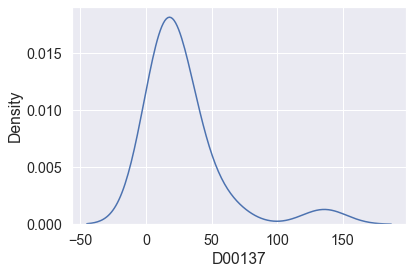

In [154]:
sns.kdeplot(expr_data['D00137'][expr_data['Label'] == -1 ] )

<AxesSubplot:xlabel='D00137', ylabel='Density'>

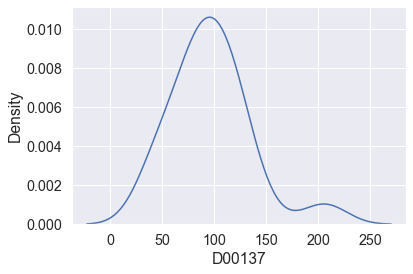

In [155]:
sns.kdeplot(expr_data['D00137'][expr_data['Label'] == 1 ] )

В анализе данных также часто применяется простой визуальный метод сравнения распределений: boxplot или ящик с усами.  На  графике ящика с усами в наглядном виде указана медиана выборки, выборочные квантили уровня 25% и 75%, а также потенциальные выбросы:


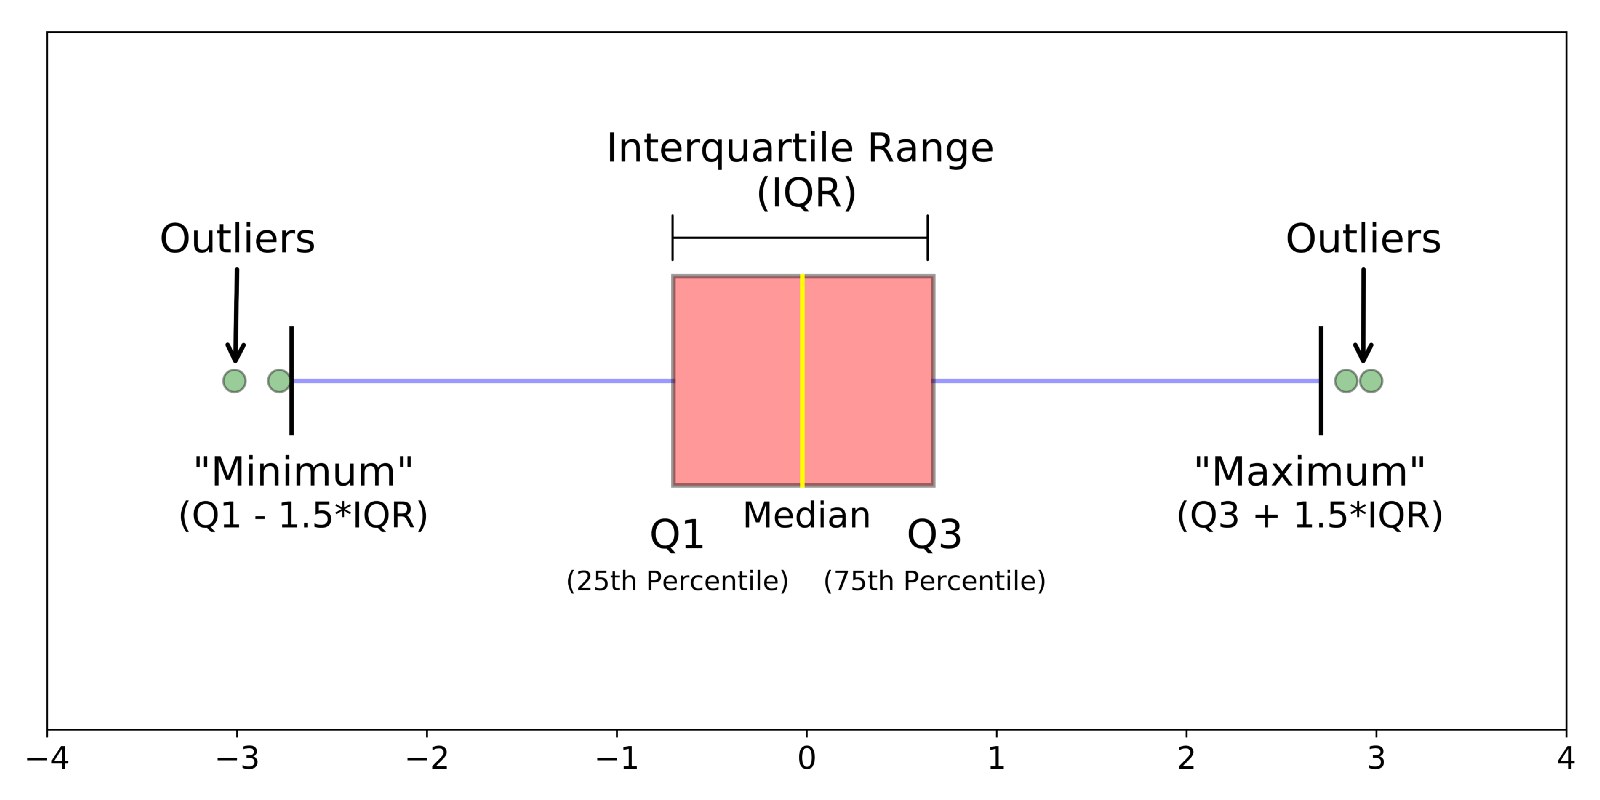

Постройте ящик с усами для гена `D00137`   , так чтобы по оси x был параметр `Label`, а по оси y &mdash; значения экспрессии, т.е. свой ящик для нормальной и раковой тканей. Используйте функцию `sns.boxplot`.

<AxesSubplot:xlabel='Label', ylabel='D00137'>

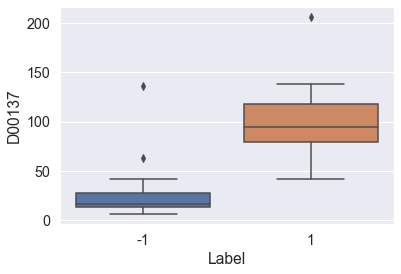

In [166]:
df_D00137 = pd.concat([expr_data[expr_data.Label==1].loc[:, ['D00137', 'Label']], 
                     expr_data[expr_data.Label==-1].loc[:, ['D00137', 'Label']]])

sns.boxplot(x = 'Label', y = 'D00137', data =df_D00137 )

Постройте аналогичные графики, используя `seaborn.violinplot` , популярную модификацию boxplot-а.

<AxesSubplot:xlabel='Label', ylabel='D00137'>

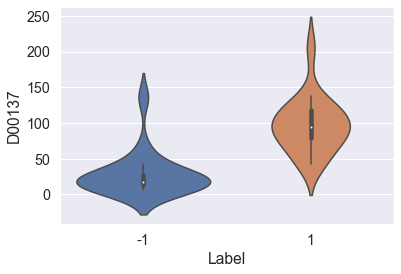

In [167]:
sns.violinplot(x = 'Label', y = 'D00137', data =df_D00137 )

Как устроен violinplot ? Какой способ визуализации кажется вам более информативным? Почему?

Он устроен похожим образом, но еще шириной отмечается эмирическая оценка плотности. Информативнее, конечно violinplot, потому что он содержит больше информации, но при простой очистке и оценке данных я бы пользовался обычным boxplot, а оценки плотности можно сделать более наглядными специальными для этого инструментами в дальнейшей работе

На графиках видно, что для одного случайного гена профили экспрессии возможно различаются.  
Но насколько это статистически достоверно и такова ли эта картина в целом?   
  
  
Для продолжения анализа необходимо понять, как именно были получены данные. Для этого обратимся к статье:  
_Gene intensity information was converted to a mean intensity for each gene by proprietary software (Affymetrix), which includes routines for filtering and centering the data (in these experiments, to 50 intensity units). Expression of genes related to smooth muscle and connective tissue was consistently greater in the normal than the tumor samples, probably because of the greater heterogeneity of tissue type in the normal samples_

Видим, что нормализация данных уже выполнена.
Во многих случаях для визуализации удобно переходить к логарифмическому формату данных.

Предварительный зрительный анализ может сказать очень многое о том, как устроены наши данные. Тем не менее, для получения полной картины простого взгляда на данные недостаточно. Первое на что нужно обрать внимание &mdash; это параметры распределения. Все распределения в первую очередь характеризуются медианой и средним. Для гена `D00137` вычислите медиану и средний уровень экспрессии в опухолевых и нормальных тканей.

In [169]:
np.median(df_D00137['D00137'][df_D00137['Label'] == 1  ]),np.median(df_D00137['D00137'][df_D00137['Label'] == -1  ])

(94.0, 17.0)

In [170]:
np.mean(df_D00137['D00137'][df_D00137['Label'] == 1  ]),np.mean(df_D00137['D00137'][df_D00137['Label'] == -1  ])

(97.0, 28.166666666666668)

Для того, чтобы утверждать, что "ген `X` овер-экспрессирован в опухолевых образцах", недостаточно просто посмотреть на боксплоты, необходимо провести статистический анализ.

Для анализ одного гена проверяются гипотезы о сравнении профилей экспрессий между опухолевыми и контрольными образцами:  
   $\mathsf{H}_0\colon$ для гена `X` не наблюдается разницы средних экспрессий;  
   $\mathsf{H}_1\colon$ для гена `X` наблюдается разница средних экспрессий.
    
Какой критерий стоит выбрать для проверки в предположении нормальности распределений? Воспользуйтесь этим критерием для проверки гипотезы для гена `Human class I alcohol dehydrogenase beta-1 subunit, allele 1 mRNA, complete cds` (см. столбец `Description`).

In [208]:
descr = '"Human class I alcohol dehydrogenase beta-1 subunit, allele 1 mRNA, complete cds"'

Cначала посмотрим на дисперсии. Пользуемся гипотезой их не равенства. Когда будем смотреть все гены, естественно нужно пользоваться этим критерием так как мы не знаем ничего об их равенстве

In [227]:
data

,Description,Tumor 27,Tumor 29,Tumor 34,Tumor 28,Tumor 35,Tumor 8,Tumor 3,Tumor 9,Tumor 4,...,Normal 32,Normal 39,Normal 10,Normal 33,Normal 5,Normal 11,Normal 6,Normal 12,Normal 40,mean_expr
Accession Number,,,,,,,,,,,,,,,,,,,,,
BioB,BioB,-2.0,-11.0,-17.0,-1.0,-14.0,-8.0,-13.0,31.0,-24.0,...,-10.0,-13.0,-25.0,-12.0,-10.0,3.0,-3.0,-24.0,-14.0,-7.771429
BioC,BioC,12.0,9.0,17.0,18.0,10.0,53.0,-2.0,57.0,-15.0,...,13.0,14.0,-10.0,14.0,-18.0,75.0,-20.0,22.0,3.0,17.628571
BioD,BioD,107.0,65.0,108.0,95.0,94.0,473.0,93.0,161.0,60.0,...,104.0,117.0,142.0,123.0,207.0,461.0,137.0,289.0,82.0,173.628571
D00003,"""Human liver cytochrome P-450 mRNA, complete cds""",2.0,7.0,1.0,-3.0,0.0,10.0,15.0,-2.0,36.0,...,0.0,0.0,74.0,4.0,13.0,24.0,4.0,4.0,-1.0,26.800000
D00015,"""Human prion protein mRNA, human PrP 27-30 mRN...",26.0,13.0,13.0,9.0,2.0,10.0,20.0,17.0,21.0,...,79.0,22.0,52.0,59.0,40.0,42.0,71.0,43.0,60.0,30.342857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b-actin-M,b-actin-M,849.0,1093.0,961.0,1100.0,844.0,1613.0,745.0,937.0,800.0,...,1450.0,1601.0,1583.0,1736.0,1546.0,1823.0,1820.0,981.0,1673.0,1219.285714
cre,cre,246.0,414.0,449.0,369.0,345.0,1067.0,5.0,2714.0,3.0,...,377.0,276.0,5.0,293.0,284.0,1093.0,229.0,1660.0,227.0,620.114286
gapdh-3,gapdh-3,1214.0,1394.0,1252.0,1313.0,1292.0,1744.0,2066.0,2092.0,2083.0,...,1104.0,1130.0,1921.0,1210.0,1385.0,1336.0,1417.0,1476.0,1048.0,1554.228571


In [229]:
columns = data.columns[1:-1]
Gene = np.zeros(len(columns))
Label = np.zeros(len(columns))

In [230]:
for i,column in enumerate(columns):
    Gene[i] = data[column][data['Description'] == descr][0]
    Label[i] = -1 if 'Tumor' in column else 1

In [231]:
sps.ttest_ind(Gene[Label == -1],Gene[Label == 1], equal_var=False)

Ttest_indResult(statistic=-5.985803078987308, pvalue=1.0869056401678417e-06)

Следовательно, в предположении нормальности, средние экспресии отличаются

Проинтерпретируйте результаты:

Давайте проверим, что наши данные действительно разделяются на два разных распределения. Для этого проверим, как будет работать этот же метод, если случайным образом перемешать метки подгрупп. Реализуйте случайное сэмплирование с помощью функции `random.choice` из библиотеки `numpy` и посмотрите, как изменится p-value (и изменится ли).

In [245]:
from numpy import random
Gene_1 = random.choice(Gene[Label == 1], size = len(Gene[Label == 1]))
Gene_m1 = random.choice(Gene[Label == -1], size = len(Gene[Label == -1]))

sps.ttest_ind(Gene_1,Gene_m1, equal_var=False)

Ttest_indResult(statistic=5.140782823447299, pvalue=1.334449709243696e-05)

Не совсем понял смысл задания. Наш критерий не зависит от перестановок данных, p-v изменилось только потому что какие-то данные повторились в процессе random.choice

Сделайте вывод

<...>

И, наконец, самое интересное. Посчитайте, в каком проценте генов, для которых с уровнем значимости 0.05 наблюдается овер-экспрессия в опухолевых тканях. При этом важно выполнить поправку на множественное тестирование.

Сначала выполним несколько учебных заданий. 

а*) Реализуйте критерий, который вы использовали в предыдущем пункте, самостоятельно. 

In [278]:
def t_test_not_eql(a,b):
    a_var = 1 / (a.size - 1) * np.sum((a- a.mean())**2)
    b_var = 1 / (b.size - 1) * np.sum((b- b.mean())**2)
    Statistics = (a - b).mean() / np.sqrt( a_var / a.size + b_var / b.size )
    v = ( (a_var / a.size + b_var / b.size)**2 / (a_var**2 / (a.size**2 * (a.size-1))
                                                   + b_var**2 / (b.size**2 * (b.size-1))) )
    return 1 - sps.t.cdf(df = v, x = Statistics) + sps.t.cdf(df = v, x = -Statistics) 

In [279]:
t_test_not_eql(Gene_1,Gene_m1)

1.334449709244296e-05

работает как надо

б) Реализуйте поправку Бонферрони (метод Бонферрони) самостоятельно. Функция должна возвращать результаты отвержения гипотез и скорректированные p-value.

In [294]:
def bonferroni(p_vals):
    if type(p_vals == list):
        p_vals = np.array(p_vals)
    Answers = [p_vals < 0.05 / p_vals.size]
    return(Answers,p_vals*p_vals.size)

в) Проведите МПГ с использованием вашей реализации и с использованием реализации критерия из scipy и МПГ из statsmodels. В случае, если вы не выполняли пункт а), используйте только вашу реализацию пункта б). Сравните результаты.

In [296]:
p_test = [0.5,0.0001,0.04]
multipletests(p_test,method = 'bonferroni'), bonferroni(p_test) # у меня не обрезает выше 1

((array([False,  True, False]),
  array([1.0e+00, 3.0e-04, 1.2e-01]),
  0.016952427508441503,
  0.016666666666666666),
 ([array([False,  True, False])], array([1.5e+00, 3.0e-04, 1.2e-01])))

Какие методы контроля FWER можно использовать в данной задаче? Сделайте проверку с использованием наилучшего (наиболее мощного) возможного метода. Используйте стандартные реализации.

Как мы видели в прошлой задаче, эксперсии различных белков могут быть зависимы, так что в мпг нужно применять метод холма-бенферрони

Далее используйте результаты последней проверки (с использованием наилучшего метода). Постройте гистограмму полученных значений p-value и скорректированных.

Сделаем для всех генов прошлую задачу:

In [346]:
P_vals = np.zeros(len(data['Description']))
Labels = np.array([ -1 if 'Tumor' in column else 1 for column in data.columns[1:-1]])
Columns = data.T.columns
data_transposed = data.T
for i,gene in enumerate(Columns):
    Gene = np.array(data_transposed[gene][1:-1])
    P_vals[i] = sps.ttest_ind(Gene[Labels == -1],Gene[Labels == 1], equal_var=False)[0]

In [349]:
Hyps = multipletests(P_vals,method = 'holm')[0]
p_vals_adjusted = multipletests(P_vals,method = 'holm')[1]

Напечатайте число генов, для которых можно отвергнуть нулевую гипотезу, а также их долю среди всех генов.

In [348]:
len(Hyps[Hyps == False])/len(Hyps)

0.5187764990914597

Посмотрим, какие же гены оверэкспрессированы. В коде ниже `p_vals_adjusted` &mdash; скорректированные значения p-value.

In [356]:
for name, function in zip(
    expr_data.columns[np.where([Hyps == False])[1]], 
    descr[np.where([Hyps == False])[1]]
):
    print(name + ": " + function)

BioB: BioB
BioC: BioC
D00102: "Human lymphotoxin (LT) mRNA, complete cds"
D00265: "Human cytochrome c mRNA, carboxyl-terminal region and 3' non-coding region"
D00596: "Human thymidylate syntase (EC 2.1.1.45) gene, complete cds"
D00760: Human mRNA for proteasome subunit HC3
D00761: Human mRNA for proteasome subunit HC5
D00762: Human mRNA for proteasome subunit HC8
D00763: Human mRNA for proteasome subunit HC9
D00860: Human mRNA for phosphoribosyl pyrophosphate synthetase (EC 2.7.6.1) subunit I
D10202: "Human mRNA for platelet-activating factor receptor, complete cds"
D10570: Human mRNA for AML1 gene
D10922: Human mRNA for FMLP-related receptor (HM63)
D10923: Human mRNA for HM74
D10925: Human mRNA for HM145
D11094: "Human mRNA for MSS1, complete cds"
D11327: "Human mRNA for protein-tyrosine phosphatase, complete cds"
D12676: "Human mRNA for lysosomal sialoglycoprotein, complete cds"
D12686: Human mRNA for eukaryotic initiation factor 4 gamma (eIF-4 gamma)
D12765: Human mRNA for E1A-F
D13

TypeError: can only concatenate str (not "NoneType") to str